# AutoKeras

In [ ]:
!pip install autokeras

In [ ]:
import numpy as np
import tensorflow as tf
import autokeras as ak

Using TensorFlow backend


In [ ]:
# 데이터 로딩
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# 데이터 전처리 : 스케일링
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [ ]:
# 데이터 전처리 : 차원 확장 (AutoKeras에 맞게 4D로 변환)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [ ]:
# AutoKeras 모델 생성
clf = ak.ImageClassifier(overwrite=True, max_trials=1)

In [ ]:
# 모델 훈련
history = clf.fit(x_train, y_train, epochs=5)

Trial 1 Complete [00h 12m 47s]
val_loss: 0.044274695217609406

Best val_loss So Far: 0.044274695217609406
Total elapsed time: 00h 12m 47s
Epoch 1/5
1875/1875 [==============================] - 165s 87ms/step - loss: 0.1585 - accuracy: 0.9523
Epoch 2/5
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0743 - accuracy: 0.9772
Epoch 3/5
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0612 - accuracy: 0.9813
Epoch 4/5
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0513 - accuracy: 0.9841
Epoch 5/5
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0447 - accuracy: 0.9857


In [ ]:
import matplotlib.pyplot as plt

# 모델의 구성 출력
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 cast_to_float32 (CastToFlo  (None, 28, 28, 1)         0         
 at32)                                                           
                                                                 
 normalization (Normalizati  (None, 28, 28, 1)         3         
 on)                                                             
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0     

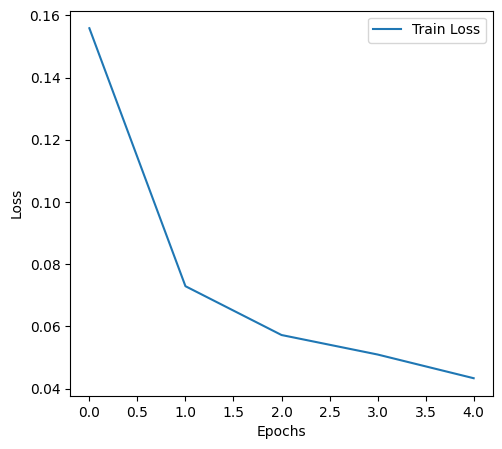

In [ ]:
# 학습 과정 시각화
plt.figure(figsize=(12, 5))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

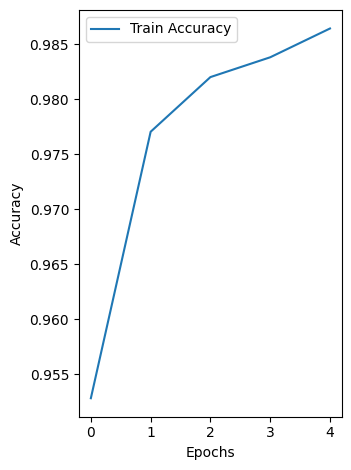

In [ ]:
# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# AutoML

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 MB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.3-py2.py3-none-any.whl size=240945068 sha256=c39b42c6555b5a29d5b9b8bd1470bdd0c4e5fc2566535a73b4dc1891657e29f6
  Stored in directory: /root/.cache/pip/wheels/f9/7d/1d/e1258f0558603969a8393cb5b22a18e313337f01627a118302
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

# H2O 초기화
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20" 2023-07-18; OpenJDK Runtime Environment (build 11.0.20+8-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20+8-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbf65nkan
  JVM stdout: /tmp/tmpbf65nkan/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpbf65nkan/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_jzjs1e
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# 데이터 로드
data = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# 데이터 분할
train, test = data.split_frame([0.8])

In [ ]:
# 응답 변수 및 입력 변수 설정
response = "response"
train[response] = train[response].asfactor()
test[response] = test[response].asfactor()

In [ ]:
# AutoML 설정 및 실행
aml = H2OAutoML(max_runtime_secs=120, seed=1)  # 정해진 시간 내에서 학습하도록 설정 가능(ex.120초)
aml.train(y=response, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),8/8
# GBM base models (used / total),4/4
# XGBoost base models (used / total),2/2
# DRF base models (used / total),1/1
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [ ]:
# 성능 평가
lb = aml.leaderboard
print(lb.head())

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_1_AutoML_1_20230825_54235     0.783152   0.556022  0.803081                0.334717  0.434849  0.189094
StackedEnsemble_AllModels_2_AutoML_1_20230825_54235     0.783113   0.555868  0.802729                0.332849  0.434826  0.189074
StackedEnsemble_BestOfFamily_3_AutoML_1_20230825_54235  0.780904   0.558395  0.799426                0.320811  0.435863  0.189977
StackedEnsemble_BestOfFamily_2_AutoML_1_20230825_54235  0.780661   0.558644  0.799744                0.332982  0.435993  0.19009
StackedEnsemble_BestOfFamily_1_AutoML_1_20230825_54235  0.780067   0.559565  0.798624                0.333495  0.436325  0.190379
GBM_1_AutoML_1_20230825_54235                           0.778814   0.56164   0.79837                 0.335922  0.437034  0.190999
GBM_3_AutoML_1_20230825_54235                           0.771489   0.568377  0.793477      

In [ ]:
# 최고 성능 모델 예측
preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
